In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports.py

In [3]:
from tqdm.notebook import tqdm

# Group size analysis

In [41]:
calc_factors = lambda x: np.array([i for i in range(1, x+1) if x%i==0])
n_gen = 500
n_seed = 10
n_dim = 100


# d = np.zeros((len(n_pops), len(optim_fns), len(n_dims), 
#                  len(init_pop_vars), n_seed, n_gen+1, 2))
# d = xr.DataArray(d, dims=('algo', 'optim_fn', 'n_dim', 
#                                 'init_pop_var', 'seed', 'gen', 'fits_mrs'),
#                     coords={'algo': algos, 
#                             'optim_fn': optim_fns,
#                             'n_dim': n_dims,
#                             'init_pop_var': init_pop_vars,
#                             'seed': list(range(n_seed)),
#                             'gen': list(range(n_gen+1)),
#                             'fits_mrs': ['fits', 'mrs'],
#                            })

# n_pops = [51, 101, 201, 401, 601, 801, 1001]
n_pops = [51, 101, 201, 401, 801, 1601, 3201]
# n_pops = [51, 101, 201, 401, 801]
# n_pops = [51, 71]
# n_pops = [11, 15]

optim_fns = [ackley, rastrigin, griewank, rosenbrock, sphere]

n_pop2n_mutpops = {n_pop: calc_factors(n_pop-1) for n_pop in n_pops}

n_pop2data = {}

for optim_fn in optim_fns:
    n_pop2data[optim_fn] = {}
    print(optim_fn)
    for n_pop in n_pops:
        f = []
        n_mutpops = n_pop2n_mutpops[n_pop]
        print(n_pop, n_mutpops)
        for n_mutpop in tqdm(n_mutpops):
            for seed in range(n_seed):
                do_seed(seed+100)
                pop = torch.randn(n_pop, n_dim)*5
                pops, fits, mrs, _ = optim.run_evolution_ours(pop, optim_fn, n_gen, n_mutpop)
                f.append(fits)
        f = torch.stack(f).reshape(len(n_mutpops), n_seed, n_gen+1, n_pop)
        n_pop2data[optim_fn][n_pop] = f


<function ackley at 0x2b7d5700ab70>
51 [ 1  2  5 10 25 50]


  0%|          | 0/6 [00:00<?, ?it/s]

101 [  1   2   4   5  10  20  25  50 100]


  0%|          | 0/9 [00:00<?, ?it/s]

201 [  1   2   4   5   8  10  20  25  40  50 100 200]


  0%|          | 0/12 [00:00<?, ?it/s]

401 [  1   2   4   5   8  10  16  20  25  40  50  80 100 200 400]


  0%|          | 0/15 [00:00<?, ?it/s]

801 [  1   2   4   5   8  10  16  20  25  32  40  50  80 100 160 200 400 800]


  0%|          | 0/18 [00:00<?, ?it/s]

1601 [   1    2    4    5    8   10   16   20   25   32   40   50   64   80
  100  160  200  320  400  800 1600]


  0%|          | 0/21 [00:00<?, ?it/s]

3201 [   1    2    4    5    8   10   16   20   25   32   40   50   64   80
  100  128  160  200  320  400  640  800 1600 3200]


  0%|          | 0/24 [00:00<?, ?it/s]

<function rastrigin at 0x2b7d5700ac80>
51 [ 1  2  5 10 25 50]


  0%|          | 0/6 [00:00<?, ?it/s]

101 [  1   2   4   5  10  20  25  50 100]


  0%|          | 0/9 [00:00<?, ?it/s]

201 [  1   2   4   5   8  10  20  25  40  50 100 200]


  0%|          | 0/12 [00:00<?, ?it/s]

401 [  1   2   4   5   8  10  16  20  25  40  50  80 100 200 400]


  0%|          | 0/15 [00:00<?, ?it/s]

801 [  1   2   4   5   8  10  16  20  25  32  40  50  80 100 160 200 400 800]


  0%|          | 0/18 [00:00<?, ?it/s]

1601 [   1    2    4    5    8   10   16   20   25   32   40   50   64   80
  100  160  200  320  400  800 1600]


  0%|          | 0/21 [00:00<?, ?it/s]

3201 [   1    2    4    5    8   10   16   20   25   32   40   50   64   80
  100  128  160  200  320  400  640  800 1600 3200]


  0%|          | 0/24 [00:00<?, ?it/s]

<function griewank at 0x2b7d5700ae18>
51 [ 1  2  5 10 25 50]


  0%|          | 0/6 [00:00<?, ?it/s]

101 [  1   2   4   5  10  20  25  50 100]


  0%|          | 0/9 [00:00<?, ?it/s]

201 [  1   2   4   5   8  10  20  25  40  50 100 200]


  0%|          | 0/12 [00:00<?, ?it/s]

401 [  1   2   4   5   8  10  16  20  25  40  50  80 100 200 400]


  0%|          | 0/15 [00:00<?, ?it/s]

801 [  1   2   4   5   8  10  16  20  25  32  40  50  80 100 160 200 400 800]


  0%|          | 0/18 [00:00<?, ?it/s]

1601 [   1    2    4    5    8   10   16   20   25   32   40   50   64   80
  100  160  200  320  400  800 1600]


  0%|          | 0/21 [00:00<?, ?it/s]

3201 [   1    2    4    5    8   10   16   20   25   32   40   50   64   80
  100  128  160  200  320  400  640  800 1600 3200]


  0%|          | 0/24 [00:00<?, ?it/s]

<function rosenbrock at 0x2b7d57029158>
51 [ 1  2  5 10 25 50]


  0%|          | 0/6 [00:00<?, ?it/s]

101 [  1   2   4   5  10  20  25  50 100]


  0%|          | 0/9 [00:00<?, ?it/s]

201 [  1   2   4   5   8  10  20  25  40  50 100 200]


  0%|          | 0/12 [00:00<?, ?it/s]

401 [  1   2   4   5   8  10  16  20  25  40  50  80 100 200 400]


  0%|          | 0/15 [00:00<?, ?it/s]

801 [  1   2   4   5   8  10  16  20  25  32  40  50  80 100 160 200 400 800]


  0%|          | 0/18 [00:00<?, ?it/s]

1601 [   1    2    4    5    8   10   16   20   25   32   40   50   64   80
  100  160  200  320  400  800 1600]


  0%|          | 0/21 [00:00<?, ?it/s]

3201 [   1    2    4    5    8   10   16   20   25   32   40   50   64   80
  100  128  160  200  320  400  640  800 1600 3200]


  0%|          | 0/24 [00:00<?, ?it/s]

<function sphere at 0x2b7d570290d0>
51 [ 1  2  5 10 25 50]


  0%|          | 0/6 [00:00<?, ?it/s]

101 [  1   2   4   5  10  20  25  50 100]


  0%|          | 0/9 [00:00<?, ?it/s]

201 [  1   2   4   5   8  10  20  25  40  50 100 200]


  0%|          | 0/12 [00:00<?, ?it/s]

401 [  1   2   4   5   8  10  16  20  25  40  50  80 100 200 400]


  0%|          | 0/15 [00:00<?, ?it/s]

801 [  1   2   4   5   8  10  16  20  25  32  40  50  80 100 160 200 400 800]


  0%|          | 0/18 [00:00<?, ?it/s]

1601 [   1    2    4    5    8   10   16   20   25   32   40   50   64   80
  100  160  200  320  400  800 1600]


  0%|          | 0/21 [00:00<?, ?it/s]

3201 [   1    2    4    5    8   10   16   20   25   32   40   50   64   80
  100  128  160  200  320  400  640  800 1600 3200]


  0%|          | 0/24 [00:00<?, ?it/s]

In [42]:
torch.save((n_pops, n_pop2n_mutpops, n_pop2data), 'data/data_group_size.th')

In [18]:
n_pops, n_pop2n_mutpops, n_pop2data = torch.load('data/data_group_size.th')

In [60]:
from paper_meta import *

In [96]:
import matplotlib as mpl
import matplotlib.cm as cm

norm = mpl.colors.Normalize(vmin=np.log10(np.min(n_pops)), vmax=np.log10(np.max(n_pops)))
cmap = cm.cool

m = cm.ScalarMappable(norm=norm, cmap=cmap)


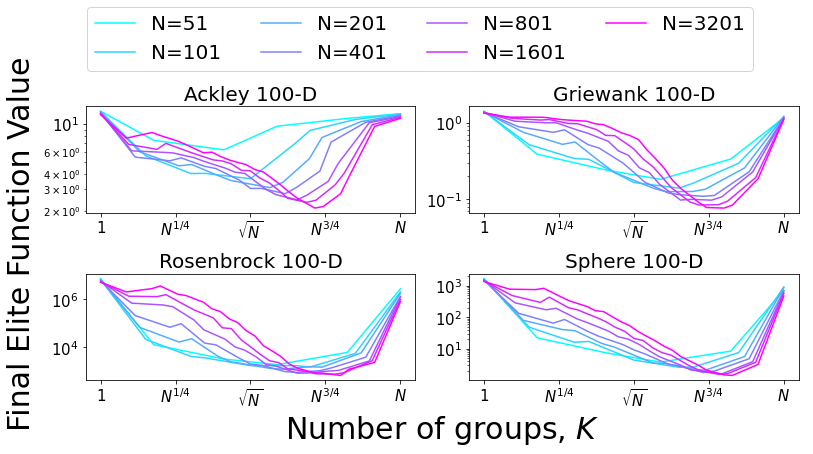

In [107]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
ax = fig.add_subplot(111)
viz.empty_ax(ax)
for i, optim_fn in enumerate([ackley, griewank, rosenbrock, sphere]):
    plt.sca(axs.flatten()[i])
    for n_pop in n_pops:
        data = n_pop2data[optim_fn][n_pop]
        n_mutpops = n_pop2n_mutpops[n_pop]

        a = data.min(dim=-1).values[..., -1].T
        x = np.exp(np.log(n_mutpops)/np.log(np.max(n_mutpops)))
        plt.plot(x, a.mean(dim=0).numpy(), label=f'N={n_pop}', c=m.to_rgba(np.log10(n_pop)))
        
    ticks = np.e**np.linspace(0, 1, 5)
    plt.xscale('log')
    plt.gca().set_xticks(ticks)
    plt.gca().set_xticklabels(['$1$', '$N^{1/4}$', '$\sqrt{N}$', '$N^{3/4}$', '$N$'])
    
    plt.gca().tick_params(axis='both', which='major', labelsize=15)
#     plt.gca().tick_params(axis='both', which='minor', labelsize=0)
    plt.minorticks_off()
    
    plt.title(optim_fn2label[optim_fn]+f' {n_dim}-D', fontsize=20)
#     plt.legend()
    plt.yscale('log')
    handles, labels = plt.gca().get_legend_handles_labels()

    
plt.sca(ax)
ax.legend(handles, labels, bbox_to_anchor=(.95, 1.4), fontsize=20, ncol=4)
plt.xlabel('Number of groups, $K$', fontsize=30, labelpad=20)
plt.ylabel('Final Elite Function Value', fontsize=30, labelpad=30)

    
plt.tight_layout()
plt.savefig('results/group_size.png', dpi=300, bbox_inches='tight')

plt.show()

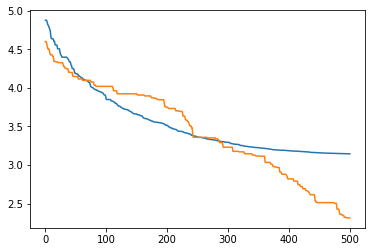

In [59]:
pop = torch.randn(17, 100)
_, fits, _, _ = optim.run_evolution_ours(pop, ackley, 500, n_mutpop=4)
plt.plot(fits.min(dim=-1).values)
pop = torch.randn(1601, 100)
_, fits, _, _ = optim.run_evolution_ours(pop, ackley, 500, n_mutpop=40)
plt.plot(fits.min(dim=-1).values)

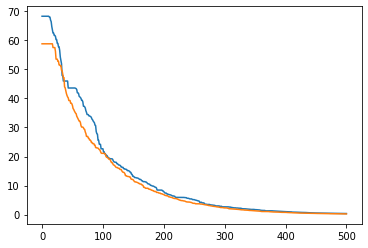

In [57]:
pop = torch.randn(65, 100)
_, fits, _ = optim.run_evolution_ns(pop, sphere, 500)
plt.plot(fits.min(dim=-1).values)
pop = torch.randn(1601, 100)
_, fits, _ = optim.run_evolution_ns(pop, sphere, 500)
plt.plot(fits.min(dim=-1).values)